In [7]:
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

(128, 64, 3)


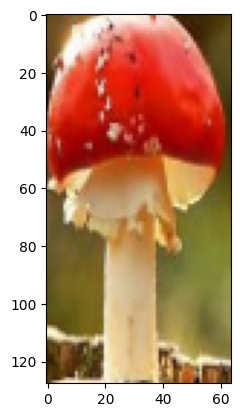

In [16]:
img2 = (mpimg.imread('p.jpg'))
img2 = resize(img2, (128, 64))
plt.imshow(img2)
print(img2.shape)

In [17]:
plot, img = hog(
    img2,
    orientations=8,
    pixels_per_cell=(8, 8),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

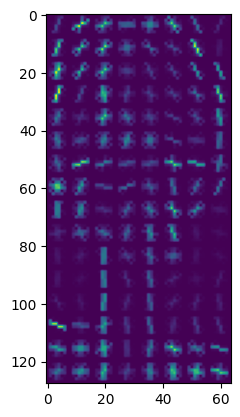

In [18]:
plt.imshow(img)

(1024,)


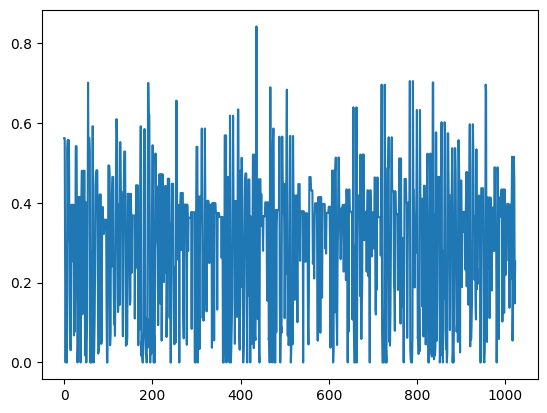

In [210]:
plt.plot(plot)
print(plot.shape)

In [3]:
import os
from os import listdir
from os.path import isfile, join

In [4]:
image_folder_path = "positive/"

onlyfiles = [f for f in listdir(image_folder_path) if isfile(join(image_folder_path, f))]

full_filenames = [join(image_folder_path,this_image) for this_image in onlyfiles]
A  = []
for this_filename in full_filenames:
    #append(hog(resize(i, (128, 64)),orientations=8,pixels_per_cell=(8, 8),cells_per_block=(1, 1),channel_axis=-1,))
    #values = hog(rgb2gray(resize(mpimg.imread(this_filename)[:,:,:3],(128,64))), orientations=8,pixels_per_cell=(8, 8),cells_per_block=(1, 1), channel_axis= -1)
    values = hog(rgb2gray(resize(mpimg.imread(this_filename)[:,:,:3],(128,64))), orientations=8,pixels_per_cell=(8, 8),cells_per_block=(1, 1))
    A.append(values)

In [5]:
X = np.array(A)

In [6]:
B = []
image_folder_path = "negative/"

onlyfiles = [f for f in listdir(image_folder_path) if isfile(join(image_folder_path, f))]

full_filenames = [join(image_folder_path,this_image) for this_image in onlyfiles]


for this_filename in full_filenames:
    #values = hog(resize(mpimg.imread(this_filename)[:,:,:3],(128,64)), orientations=8,pixels_per_cell=(8, 8),cells_per_block=(1, 1),channel_axis=-1)
    values = hog(rgb2gray(resize(mpimg.imread(this_filename)[:,:,:3],(128,64))), orientations=8,pixels_per_cell=(8, 8),cells_per_block=(1, 1))
    B.append(values)

In [7]:
Y = np.array(B)

In [23]:
from sklearn import svm
from sklearn.model_selection import train_test_split

In [217]:
X.shape

(113, 1024)

In [218]:
Y.shape

(90, 1024)

In [8]:
X = np.array(A + B)
Y = np.array([1 for i in A] + [0 for i in B])

In [220]:
Y.shape

(203,)

In [221]:
X.shape

(203, 1024)

In [222]:
Y.shape

(203,)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [224]:
from sklearn.model_selection import GridSearchCV

In [225]:

ml = svm.SVC() 

param_grid = {'C': [ 0.0005, 0.001,0.005,0.01,0.05,0.1,0.5, 1, 2,3,4,5,6,7,8,9,10,11,12,13,15, 100, 1000,10000], 
              'gamma': [1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001,0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(ml, param_grid, refit = True, verbose = 1,cv=15)

grid_search=grid.fit(X, Y)

Fitting 15 folds for each of 288 candidates, totalling 4320 fits


In [226]:
model = grid.best_estimator_
model.fit(X, Y)

SVC(C=1000, gamma=5e-05)

In [227]:
ms = svm.SVC(kernel='linear')
ms.fit(X_train,y_train)

SVC(kernel='linear')

In [228]:
ms.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0])

In [229]:
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 0 1 1 1 0 1 1 1 0]


In [230]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0])

In [231]:
ms.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [232]:
i = model.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(model.predict(X_test), y_test)

NameError: name 'model' is not defined

In [68]:
from sklearn.metrics import confusion_matrix

In [236]:
confusion_matrix(y_test, model.predict(X_test))

array([[17,  0],
       [ 0, 34]], dtype=int64)

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [238]:
a = confusion_matrix(y_test,model.predict(X_test))
disp=ConfusionMatrixDisplay(a)

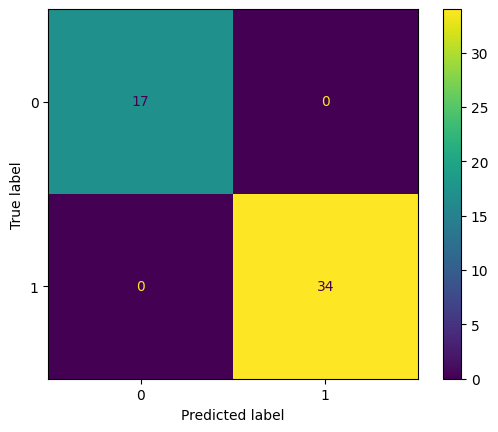

In [239]:
disp.plot()

In [240]:
model.support_vectors_.shape

(176, 1024)

In [241]:
model.support_vectors_.shape
np.savetxt("support_vectors.txt", model.support_vectors_, newline=" ")

In [242]:
model.support_
np.savetxt("support.txt", model.support_, newline=" ")

In [243]:
model.n_support_
np.savetxt("n_support.txt", model.n_support_, newline=" ")

In [244]:
model.dual_coef_
np.savetxt("model.dual_coef.txt", model.dual_coef_, newline=" ")

In [245]:
model.intercept_

array([0.82692433])

In [246]:
model.dual_coef_

array([[ -540.31689435,  -312.82881556,  -422.63203516,  -952.98725443,
         -584.56353553,  -291.20511428, -1000.        ,  -941.89666306,
         -215.12509803,   -90.01360177,  -412.69926529,  -743.20153318,
         -927.65856452, -1000.        , -1000.        ,  -841.21817992,
        -1000.        , -1000.        , -1000.        ,  -533.86099965,
         -444.44380617, -1000.        , -1000.        ,  -526.47396828,
         -827.40110833, -1000.        , -1000.        ,  -481.71995737,
         -391.69640338, -1000.        , -1000.        ,  -356.85623919,
         -848.34452385,  -779.21228635, -1000.        , -1000.        ,
        -1000.        , -1000.        , -1000.        ,  -746.65309341,
        -1000.        , -1000.        , -1000.        ,  -299.84036754,
         -828.83593178,  -335.97292667,  -412.74813737,  -231.50833239,
         -223.47243597,  -420.91282816, -1000.        , -1000.        ,
         -283.37704035,  -920.51412448,  -477.45030832,  -741.45

In [247]:
j = model.predict(X_train)

In [248]:
accuracy_score(j, y_train)

0.993421052631579

In [249]:
from sklearn.metrics.pairwise import rbf_kernel

In [250]:
def RBF(X,Y, gamma):
    
    # Free parameter gamma
    if gamma == None:
        gamma = 1.0/X.shape[1]
        
    # RBF kernel Equation
    K = np.exp(-gamma * np.sum((X - Y)**2, axis = -1))
    
    return K

In [251]:
def squared_distance(x, y):
    d = np.sqrt(((x - y) ** 2).sum())
    return d

In [252]:
model = grid.best_estimator_
model.fit(X, Y)

SVC(C=1000, gamma=5e-05)

In [253]:
model.gamma

5e-05

In [254]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0])

In [255]:
X_test[0].reshape(1,1024).shape

(1, 1024)

In [256]:
np.savetxt("model.dual_coef.txt", model.dual_coef_[0])

In [257]:
np.savetxt("model.support_vectors_.txt", model.support_vectors_)

In [258]:
gamma = model.gamma

In [259]:
gamma

5e-05

In [260]:
b = model.intercept_

In [261]:
b

array([0.82692433])

In [262]:
dual_coef = np.loadtxt('model.dual_coef.txt')

In [263]:
support = np.loadtxt('model.support_vectors_.txt')

In [264]:
def dfk(coef,Xex,vectors,g,bet):
    k = np.sign(np.sum(coef*RBF(Xex,vectors,g)) + bet)
    return k

In [265]:
k = np.array([dfk(dual_coef,X_test[i],support,gamma,b) for i in range(X_test.shape[0])]).flatten()
print(k)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1.
  1.  1. -1.  1. -1.  1.  1. -1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1.
 -1.  1. -1.  1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1.]


In [266]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0])

In [267]:
k = np.array([dfk(dual_coef,X_test[i],support,gamma,b) for i in range(X_test.shape[0])]).flatten()
k = [0 if i==-1 else i for i in k]
print(np.int32(k)==model.predict(X_test))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


In [268]:
print(k)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0]


In [269]:
k = np.array([np.sign(np.sum(model.dual_coef_*RBF(X_test[i],model.support_vectors_,model.gamma)) + model.intercept_) 
              for i in range(X_test.shape[0])]).flatten()
k = [0 if i==-1 else i for i in k]
print(np.int32(k)==model.predict(X_test))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


In [270]:
from sklearn.linear_model import LogisticRegression

In [271]:
kek = LogisticRegression(random_state=0).fit(X_train,y_train)

In [355]:
accuracy_score(kek.predict(X_test),y_test)

0.803921568627451

In [273]:
kek.coef_*X_test[0] + kek.intercept_

array([[0.13942721, 0.08581593, 0.07189347, ..., 0.10022872, 0.12588099,
        0.03929057]])

In [274]:
from sklearn.neural_network import MLPClassifier

In [275]:
clf = MLPClassifier( max_iter=1000 , hidden_layer_sizes=X_test.shape[0], activation='logistic' ).fit(X_train, y_train)

In [66]:
accuracy_score(clf.predict(X_test),y_test)

NameError: name 'accuracy_score' is not defined

In [92]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras import layers

In [145]:
pchel = keras.Sequential([
    layers.Dense(X.shape[1], activation='relu'),
    layers.Dense(3, activation='relu'),
    #layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid'),
])

In [146]:
pchel.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [147]:
X.shape[0]

203

In [148]:
history = pchel.fit(
    X_train, y_train, epochs= 20
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - binary_accuracy: 0.5125 - loss: 0.7605  
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5575 - loss: 0.6929 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5630 - loss: 0.6927 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5354 - loss: 0.6928 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5431 - loss: 0.6926 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5413 - loss: 0.6926 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5278 - loss: 0.6927 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.4891 - loss: 0.6934 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5392 - loss: 0.6924 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5157 - loss: 0.6928 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5108 - loss: 0.6929 
Epoch 1

In [121]:
image_folder_path = "test/"

onlyfiles = [f for f in listdir(image_folder_path) if isfile(join(image_folder_path, f))]

full_filenames = [join(image_folder_path,this_image) for this_image in onlyfiles]
K  = []
for this_filename in full_filenames:
    #append(hog(resize(i, (128, 64)),orientations=8,pixels_per_cell=(8, 8),cells_per_block=(1, 1),channel_axis=-1,))
    values = hog(rgb2gray(resize(mpimg.imread(this_filename)[:,:,:3],(128,64))), orientations=8,pixels_per_cell=(8, 8),cells_per_block=(1, 1))
    K.append(values)
K = np.array(K)

In [122]:
X_test.shape

(21, 1024)

In [123]:
y_test

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [124]:
k = pchel.predict(X_test)
c = [ 0 if i<0.5 else 1 for i in k]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [125]:
pchel.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[0.5602311 ],
       [0.55720115],
       [0.5525117 ],
       [0.5617734 ],
       [0.5552267 ],
       [0.54116106],
       [0.559723  ],
       [0.5551084 ],
       [0.561155  ],
       [0.55986315],
       [0.5529812 ],
       [0.56233263],
       [0.5512587 ],
       [0.55985254],
       [0.55761683],
       [0.5659847 ],
       [0.552609  ],
       [0.564965  ],
       [0.56481254],
       [0.55346817],
       [0.54837704]], dtype=float32)

In [126]:
accuracy_score(y_test, c)

0.7142857142857143